<a href="https://colab.research.google.com/github/alexanderbeleno16/taller1_corte1_mi_20241/blob/main/taller1_corte1_mi_20241.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TALLER #1 CORTE 1 MI 2024-1 NOCTURNO**

## CORPORACIÓN UNIVERSITARIA LATINOAMERICANA

### PRESENTADO POR:

### ALEXANDER BELEÑO, VANESSA BAENA, JHON DIAZ


## **INFORMACIÓN RELACIONADA AL DATASET**

La información sobre la población colombiana residente y registrada en las diversas misiones consulares en el exterior proporciona un panorama detallado y crucial para comprender la diáspora colombiana y sus características demográficas. Esta data abarca una variedad de aspectos, desde el género y la edad hasta el nivel educativo, la ocupación y el lugar de residencia de los ciudadanos colombianos en el extranjero. Tal información no solo permite a las autoridades consulares entender las necesidades específicas de sus ciudadanos en el exterior, sino que también facilita la implementación de políticas y programas destinados a brindarles apoyo y protección. Además, el conocimiento del consulado de la circunscripción que atiende a cada individuo contribuye a una gestión más efectiva de los servicios consulares y a una mejor atención personalizada a los colombianos en el extranjero.

Esta recopilación exhaustiva de datos no solo ayuda a trazar perfiles demográficos precisos de la población colombiana en el exterior, sino que también ofrece una visión más amplia de la diáspora y sus contribuciones a nivel global. El conocimiento detallado sobre la distribución por género, edad, nivel educativo y ocupación permite identificar tendencias migratorias y patrones socioeconómicos, lo que a su vez puede informar políticas públicas tanto en Colombia como en los países de acogida. Además, esta información puede ser valiosa para el diseño de programas de integración y desarrollo que beneficien tanto a los colombianos en el exterior como a sus comunidades de origen. En resumen, la compilación y análisis de datos sobre la población colombiana en el exterior desempeña un papel fundamental en la formulación de estrategias para fortalecer los lazos entre la diáspora y su país de origen, promoviendo así un mayor desarrollo y bienestar para todos los involucrados.

## **REFERENCIA DEL DATASET**
https://www.datos.gov.co/Estad-sticas-Nacionales/Colombianos-registrados-en-el-exterior/y399-rzwf/about_data

## **IMPORTACIÓN DE LIBRERIAS**
En esta sección del código se realizan las importaciones correspondientes a cada librería que permitiran la realización exitosa de la lectura y el tratamiento de los datos del archivo ".csv".

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **CARGUE Y LECTURA DEL ARCHIVO CSV**
En esta sección del código se carga los datos del archivo CSV en un objeto llamado data_frame

In [3]:
data_frame = pd.read_csv('drive/MyDrive/files/Colombianos_registrados_en_el_exterior_20240221.csv')

## **LIMPIEZA DE LA DATA**

ANTES DE TRABAJAR LOS DATOS ES MUY IMPORTANTE CONOCERLOS Y LIMPIARLO PARA EVITAR DISTORCIONES.

Para este caso proceseremos con la limpieza de los datos de las columnas con las que vamos a trabajar,
en este caso las columnas "Edad", "Altura" y "Cantidad de personas".

La cantidad de datos en las columnas es uniformo, lo cual nos indica que no hay datos faltantes a tratar.
Actualmente la columna "Localidad" no es inecesaria en nuestro conjunto de datos pero, de mantendra temporalmente.
En base a los datos tratados, es normal que dispongamos de determinadas filas con la misma informacion, por
lo que no es bueno eliminar las columnas repetidas.

**COLUMNA EDAD:**
Eliminamos los datos no validos de las columnas como los -1 lo cual no tiene sentido en nuestros datos
(aunque indique que no se identifica la edad).
Tambien eliminamos los valores extremos, lo cuales son personas mayores a 100 años.

**COLUMNA ESTATURA:**
En el caso de la estatura los valores extremos son menores de 35CM pero tambien hay que tener en cuenta que
los inferiores a 10CM no tienen sentido e el ajuste es necesario.

**COLUMNA CANTIDAD DE PERSONAS:**
Con respecto a la cantidad de personas, solo requiere un ajuste preventivo en el cual se eliminara los
valores negativos al no tener sentido y los mayores a 500 para evitar grandes desvios en la graficacion.

In [13]:
data_frame.drop(data_frame[(data_frame['Edad (años)'] <= 0)].index, inplace=True)
data_frame.drop(data_frame[(data_frame['Edad (años)'] >= 100)].index, inplace=True)
data_frame.drop(data_frame[(data_frame['Estatura (CM)'] < 35)].index, inplace=True)
data_frame.drop(data_frame[(data_frame['Estatura (CM)'] > 190)].index, inplace=True)
data_frame.drop(data_frame[(data_frame['Cantidad de personas'] < 0)].index, inplace=True)
data_frame.drop(data_frame[(data_frame['Cantidad de personas'] > 500)].index, inplace=True)

## **NOMBRE Y TIPO DE DATOS DE LAS COLUMNAS**

La función **data_frame.info()** en Pandas proporciona un resumen conciso de la estructura y la información básica sobre el DataFrame cargado. RangeIndex: 739595 entries, 0 to 739594: Indica que el DataFrame tiene un índice que va desde 0 hasta 739594, y contiene un total de 739595 filas (entradas).

**Data columns (total 14 columns):** Indica que hay un total de 14 columnas en el DataFrame.

**Column:** Lista los nombres de las columnas.

**Non-Null Count:** Muestra el número de valores no nulos en cada columna, lo que indica cuántos valores válidos hay en cada columna. En este caso, todas las columnas tienen 739595 valores no nulos, lo que significa que no hay valores faltantes en ninguna columna.

In [15]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279489 entries, 1 to 739594
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   País                   279489 non-null  object
 1   Código ISO país        279489 non-null  object
 2   Oficina de registro    279489 non-null  object
 3   Grupo edad             279489 non-null  object
 4   Edad (años)            279489 non-null  int64 
 5   Área Conocimiento      279489 non-null  object
 6   Sub Area Conocimiento  279489 non-null  object
 7   Nivel Académico        279489 non-null  object
 8   Estado civil           279489 non-null  object
 9   Género                 279489 non-null  object
 10  Etnia de la persona    279489 non-null  object
 11  Estatura (CM)          279489 non-null  int64 
 12  Localización           279489 non-null  object
 13  Cantidad de personas   279489 non-null  int64 
dtypes: int64(3), object(11)
memory usage: 32.0+ MB


## **PRIMEROS 5 REGISTROS**

La función data_frame.head() en Pandas se utiliza para mostrar las primeras filas del DataFrame. Por defecto, **muestra las primeras 5 filas** pero este número puede cambiar si así se desea. Esta función es útil para obtener una vista previa rápida de cómo se ven los datos en el DataFrame sin tener que mostrar todo el conjunto de datos, lo que puede ser especialmente útil si el DataFrame es grande.

In [16]:
data_frame.head()

,País,Código ISO país,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Localización,Cantidad de personas
1,VENEZUELA,VEN,C. PUERTO LA CRUZ,ADULTO,52,NO INDICA,NO INDICA,PRIMARIA,SOLTERO,FEMENINO,NINGUNA,151,"(6.42375, -66.58973)",1
2,ESPAÑA,ESP,C. MADRID,ADULTO,43,NO INDICA,NO INDICA,PRIMARIA,SOLTERO,MASCULINO,SIN ETNIA REGISTRADA,172,"(40.463667, -3.74922)",1
5,ESTADOS UNIDOS,USA,C. MIAMI,ADULTO,56,NO INDICA,NO INDICA,BACHILLERATO,CASADO,FEMENINO,SIN ETNIA REGISTRADA,158,"(37.09024, -95.712891)",1
8,ESTADOS UNIDOS,USA,C. ORLANDO,ADULTO,37,NO INDICA,NO INDICA,PREGRADO - TÉCNICO PROFESIONAL,SOLTERO,FEMENINO,NINGUNA,161,"(37.09024, -95.712891)",1
9,ECUADOR,ECU,C. ESMERALDAS,ADULTO,32,NINGUNA,NINGUNA,BACHILLERATO,UNION_LIBRE,FEMENINO,OTRO,152,"(-1.831239, -78.183406)",1


## **GRUPO DE 5 FILAS**

El método iloc[] en Pandas se utiliza para la indexación basada en la posición entera de las filas y columnas en un DataFrame. La palabra "iloc" significa "indexación por localización entera". Este método permite acceder a los datos utilizando números enteros para especificar la ubicación de las filas y columnas.

Es útil cuando quieres acceder a los datos en un DataFrame basándote en su posición numérica, ya sea para seleccionar filas específicas, columnas específicas o segmentos del DataFrame. Esto puede ser útil cuando los índices no son necesariamente números enteros consecutivos o cuando necesitas acceder a los datos sin tener en cuenta los índices.

In [17]:
data_frame.iloc[6:11]

,País,Código ISO país,Oficina de registro,Grupo edad,Edad (años),Área Conocimiento,Sub Area Conocimiento,Nivel Académico,Estado civil,Género,Etnia de la persona,Estatura (CM),Localización,Cantidad de personas
13,ESTADOS UNIDOS,USA,C. CHICAGO,ADULTO MAYOR,60,NO INDICA,NO INDICA,POSTGRADO - MAESTRIA,CASADO,FEMENINO,SIN ETNIA REGISTRADA,165,"(37.09024, -95.712891)",1
15,FRANCIA,FRA,C. PARIS,ADULTO,41,NO INDICA,NO INDICA,BACHILLERATO,SOLTERO,MASCULINO,NINGUNA,170,"(46.227638, 2.213749)",1
16,ARGENTINA,ARG,C. BUENOS AIRES,ADULTO,40,NO INDICA,NO INDICA,PREGRADO - TÉCNICO PROFESIONAL,SOLTERO,FEMENINO,NINGUNA,147,"(-38.416097, -63.616672)",1
18,ESTADOS UNIDOS,USA,C. CHICAGO,ADULTO MAYOR,67,NO INDICA,NO INDICA,PRIMARIA,SOLTERO,FEMENINO,NINGUNA,151,"(37.09024, -95.712891)",1
20,ECUADOR,ECU,C. NUEVA LOJA,ADULTO MAYOR,80,NO INDICA,NO INDICA,PRIMARIA,CASADO,MASCULINO,OTRO,165,"(-1.831239, -78.183406)",1


## **GRUPO DE 5 COLUMNAS**

El método iloc[] en Pandas se utiliza para indexar y seleccionar datos de un DataFrame basándose en su posición entera, tanto para filas como para columnas. Sin embargo, cuando se utiliza para seleccionar columnas, se especifican las posiciones de las columnas en lugar de las filas.

In [18]:
data_frame.iloc[:, :5]

,País,Código ISO país,Oficina de registro,Grupo edad,Edad (años)
1,VENEZUELA,VEN,C. PUERTO LA CRUZ,ADULTO,52
2,ESPAÑA,ESP,C. MADRID,ADULTO,43
5,ESTADOS UNIDOS,USA,C. MIAMI,ADULTO,56
8,ESTADOS UNIDOS,USA,C. ORLANDO,ADULTO,37
9,ECUADOR,ECU,C. ESMERALDAS,ADULTO,32
...,...,...,...,...,...
739583,ITALIA,ITA,C. ROMA,ADULTO,57
739584,FRANCIA,FRA,C. PARIS,ADULTO JOVEN,28
739588,ESTADOS UNIDOS,USA,C. MIAMI,ADULTO JOVEN,23
739593,CHILE,CHL,C. SANTIAGO,ADULTO MAYOR,62


## **3 CAMPOS DE VARIABLE CUANTITATIVA**

PARA LOS SIGUIENTES CAMPOS:
1.   Edad (años).
2.   Estatura (CM).
3.   Cantidad de personas.

SE REALIZA:
1.   Media
2.   Moda
3.   Mediana
4.   Máximo
5.   Mínimo
6.   Caja de bigote
7.   Histograma

##### **MEDIA**

La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos. En pandas, el método que funciona para obtener el promedio o la media es mean().

In [19]:
promedio = data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].mean()
print("Promedio por columna:\n", promedio)

Promedio por columna:
 Edad (años)              49.395987
Estatura (CM)           164.234299
Cantidad de personas      1.117436
dtype: float64


##### **MODA**

En Pandas, el método mode() se utiliza para calcular la moda de un DataFrame o de una Serie. La moda representa el valor que aparece con mayor frecuencia en un conjunto de datos.

Cuando aplicas mode() a un DataFrame, el método devuelve un nuevo DataFrame que contiene las modas de cada columna. Si hay varios valores que son igualmente frecuentes y son la moda, mode() devolverá todos esos valores.

In [42]:
print("Moda por columna:\n")
data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].mode()

Moda por columna:



,Edad (años),Estatura (CM),Cantidad de personas
0,44,160,1


##### **MEDIANA**
La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante. En pandas, el método que funciona para obtener el promedio o la media es **median()**.

In [47]:
print("Mediana por columna:\n")
data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].median()

Edad (años)              48.0
Estatura (CM)           165.0
Cantidad de personas      1.0
dtype: float64

##### **MÁXIMO**
El método **max()** en Pandas se utiliza para calcular el valor máximo en una columna o en todo el DataFrame, dependiendo de cómo se utilice.


In [48]:
print("Máximo valor por columna:\n")
data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].max()

Máximo valor por columna:



Edad (años)              99
Estatura (CM)           190
Cantidad de personas     17
dtype: int64

##### **MINIMO**
El método min() en Pandas se utiliza para calcular el valor mínimo en una columna o en todo el DataFrame, similar al método max().

In [49]:
print("Minimo valor por columna:\n")
data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].min()

Minimo valor por columna:



Edad (años)              7
Estatura (CM)           35
Cantidad de personas     1
dtype: int64

##### **CAJA DE BIGOTE**


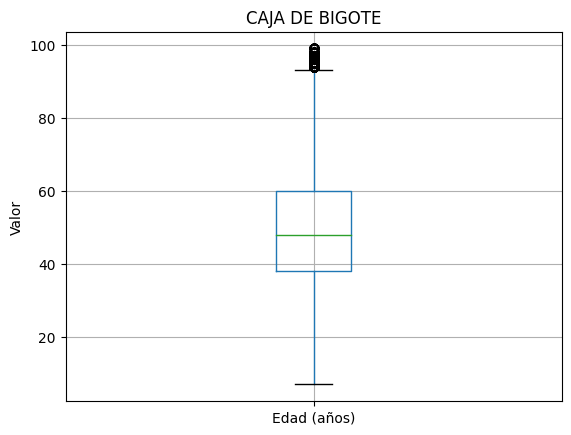

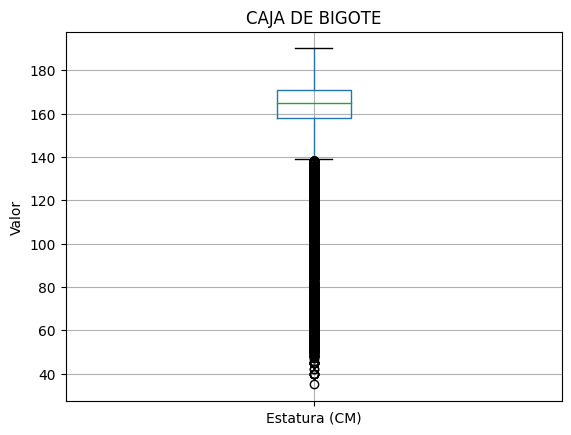

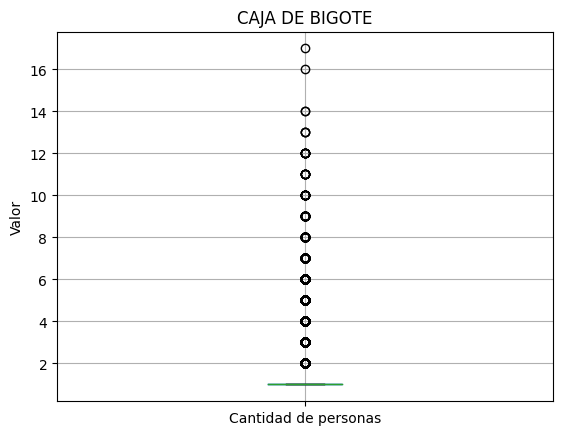

In [24]:
data_frame.boxplot(column='Edad (años)')
plt.title('CAJA DE BIGOTE')
plt.ylabel('Valor')
plt.show()

data_frame.boxplot(column='Estatura (CM)')
plt.title('CAJA DE BIGOTE')
plt.ylabel('Valor')
plt.show()

data_frame.boxplot(column='Cantidad de personas')
plt.title('CAJA DE BIGOTE')
plt.ylabel('Valor')
plt.show()

##### **HISTOGRAMA**
La función hist() se utiliza para especificar el número de contenedores o intervalos en los que se dividirá el rango de los datos para crear el histograma. En otras palabras, determina la cantidad de barras que se mostrarán en el histograma.

En este caso, bins=10 significa que se crearán 10 contenedores para representar los datos en el histograma. Ajustar el valor de bins puede ayudar a visualizar mejor la distribución de los datos y a detectar patrones o características importantes en ellos. Un número inadecuado de bins puede hacer que el histograma sea demasiado generalizado o demasiado detallado, por lo que elegir el valor correcto es importante para una visualización adecuada de los datos.

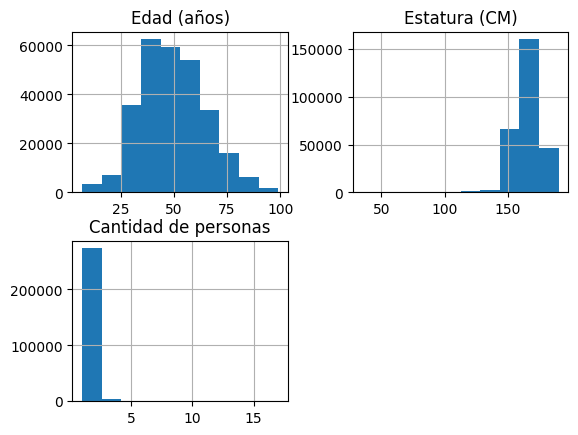

In [25]:
data_frame.loc[:, ['Edad (años)', 'Estatura (CM)', 'Cantidad de personas']].hist(bins=10)
plt.show()

## **3 CAMPOS DE VARIABLE CUALITATIVA**

PARA LOS SIGUIENTES CAMPOS:
1.   Área Conocimiento.
2.   Grupo edad.
3.   Género.

SE REALIZA:
1.   Moda
2.   Tabla de frecuencia absoluta y relativa
3.   Diagrama de barrase
4.   Diagrama de tortas
5.   Campos únicos


##### **MODA**

En Pandas, el método mode() se utiliza para calcular la moda de un DataFrame o de una Serie. La moda representa el valor que aparece con mayor frecuencia en un conjunto de datos.

Cuando aplicas mode() a un DataFrame, el método devuelve un nuevo DataFrame que contiene las modas de cada columna. Si hay varios valores que son igualmente frecuentes y son la moda, mode() devolverá todos esos valores.

In [89]:
print("Moda por columna:\n")
data_frame.loc[:, ['Área Conocimiento', 'Grupo edad', 'Género']].mode()

Moda por columna:



,Área Conocimiento,Grupo edad,Género
0,NO INDICA,ADULTO,FEMENINO


##### **FRECUENCIA ABSOLUTA**

In [90]:
print("\n Frecuencia absoluta Área Conocimiento: \n", data_frame['Área Conocimiento'].value_counts())
print("\n Frecuencia absoluta Grupo edad: \n", data_frame['Grupo edad'].value_counts())
print("\n Frecuencia absoluta Género: \n", data_frame['Género'].value_counts())


 Frecuencia absoluta Área Conocimiento: 
 NO INDICA                                       183155
NINGUNA                                          51171
ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES     12448
INGENIERÍA, ARQUITECTURA Y AFINES                10355
CIENCIAS SOCIALES Y HUMANAS                       7028
CIENCIAS DE LA SALUD                              6663
BELLAS ARTES                                      3181
CIENCIAS DE LA EDUCACIÓN                          2884
MATEMÁTICAS Y CIENCIAS NATURALES                  1394
AGRONOMÍA, VETERINARIA Y AFINES                    784
AGRONOMÍA, VETERINARIA Y ZOOTECNIA                 132
COCINA Y CULINARIA                                 127
AVIACIÓN                                            94
(NO REGISTRA)                                       73
Name: Área Conocimiento, dtype: int64

 Frecuencia absoluta Grupo edad: 
 ADULTO          188062
ADULTO MAYOR     72511
ADULTO JOVEN     14993
ADOLESCENTE       2723
INFANTE           120

##### **FRECUENCIA RELATIVA**


In [91]:
print("\n Frecuencia relativa Área Conocimiento: \n", (100 * data_frame["Área Conocimiento"].value_counts() / len(data_frame["Área Conocimiento"])))
print("\n Frecuencia relativa Grupo edad: \n", (100 * data_frame["Grupo edad"].value_counts() / len(data_frame["Grupo edad"])))
print("\n Frecuencia relativa Género: \n", (100 * data_frame["Género"].value_counts() / len(data_frame["Género"])))


 Frecuencia relativa Área Conocimiento: 
 NO INDICA                                       65.532096
NINGUNA                                         18.308771
ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES     4.453843
INGENIERÍA, ARQUITECTURA Y AFINES                3.704976
CIENCIAS SOCIALES Y HUMANAS                      2.514589
CIENCIAS DE LA SALUD                             2.383994
BELLAS ARTES                                     1.138149
CIENCIAS DE LA EDUCACIÓN                         1.031883
MATEMÁTICAS Y CIENCIAS NATURALES                 0.498767
AGRONOMÍA, VETERINARIA Y AFINES                  0.280512
AGRONOMÍA, VETERINARIA Y ZOOTECNIA               0.047229
COCINA Y CULINARIA                               0.045440
AVIACIÓN                                         0.033633
(NO REGISTRA)                                    0.026119
Name: Área Conocimiento, dtype: float64

 Frecuencia relativa Grupo edad: 
 ADULTO          67.287800
ADULTO MAYOR    25.944134
ADULTO JOVEN     

##### **GRAFICO DE BARRAS**


 GRAFICO DE BARRAS (Área Conocimiento): 
 Axes(0.125,0.11;0.775x0.77)


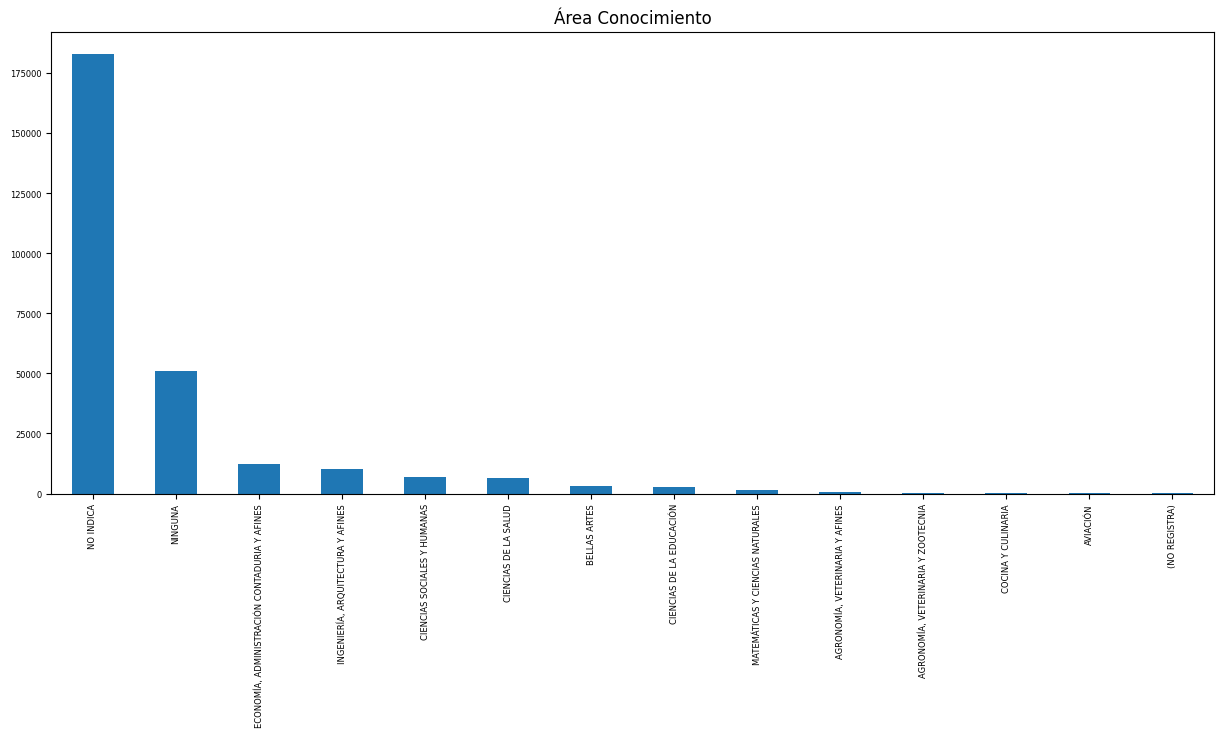

In [92]:
print("\n GRAFICO DE BARRAS (Área Conocimiento): \n", data_frame["Área Conocimiento"].value_counts().plot(kind="bar",figsize=(15,6),title="Área Conocimiento", fontsize=6))


 GRAFICO DE BARRAS (Grupo edad): 
 Axes(0.125,0.11;0.775x0.77)


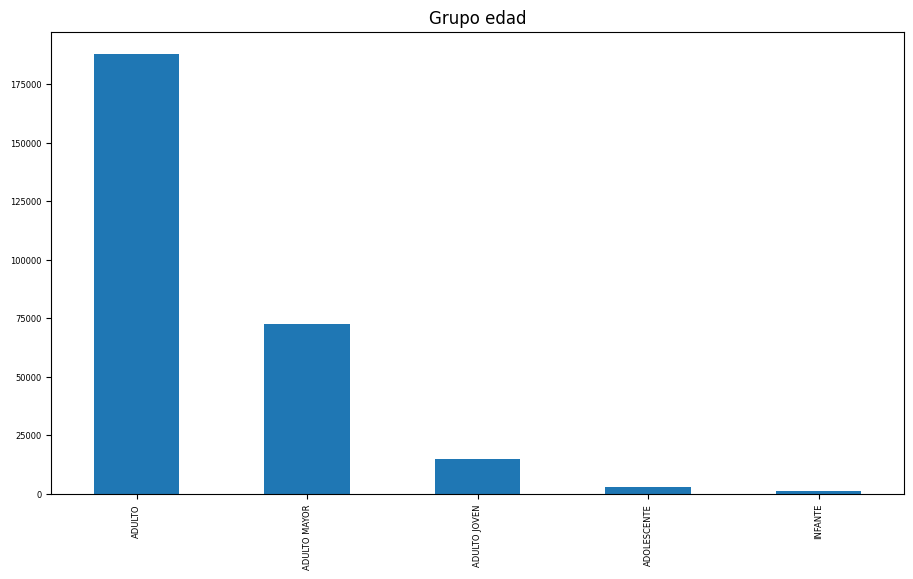

In [61]:
print("\n GRAFICO DE BARRAS (Grupo edad): \n", data_frame["Grupo edad"].value_counts().plot(kind="bar",figsize=(11,6),title="Grupo edad", fontsize=6))


 GRAFICO DE BARRAS (Género): 
 Axes(0.125,0.11;0.775x0.77)


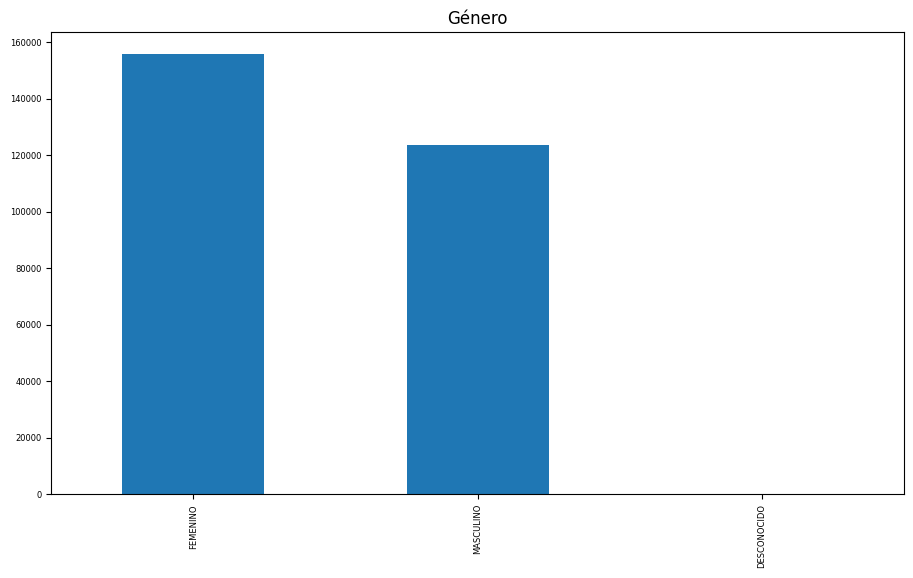

In [62]:
print("\n GRAFICO DE BARRAS (Género): \n", data_frame["Género"].value_counts().plot(kind="bar",figsize=(11,6),title="Género", fontsize=6))

##### **GRAFICO DE TORTA**

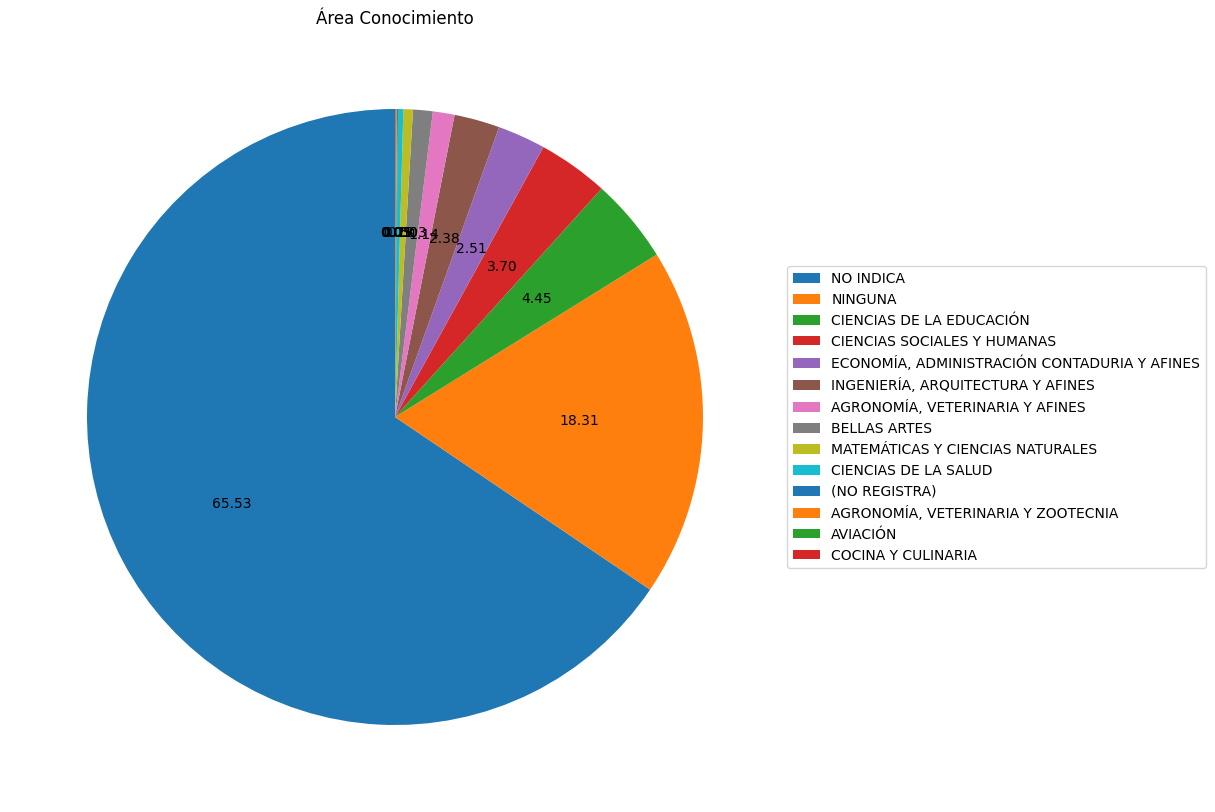

In [93]:
# data_frame["País"].value_counts().plot(kind="pie",autopct="%.2f", figsize=(12,10), title= "País" )

# Crear el gráfico circular
plt.figure(figsize=(12, 10))
plt.pie(data_frame["Área Conocimiento"].value_counts(), labels=None, autopct="%.2f", startangle=90)
plt.legend(data_frame['Área Conocimiento'].unique(), loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Área Conocimiento')
plt.show()

<Axes: title={'center': 'Grupo edad'}, ylabel='Grupo edad'>

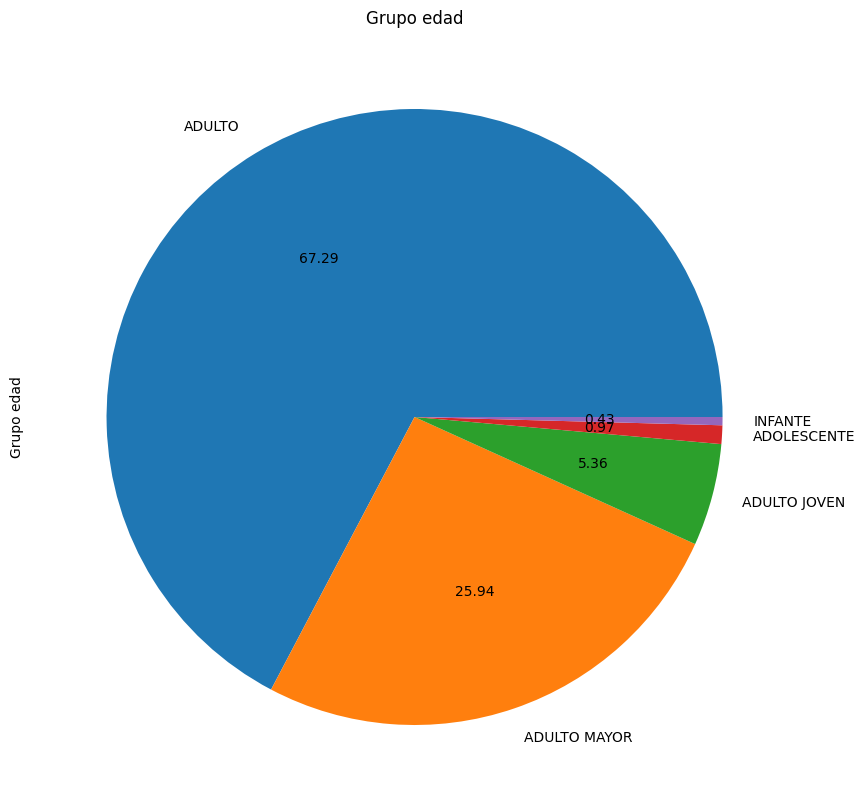

In [69]:
data_frame["Grupo edad"].value_counts().plot(kind="pie",autopct="%.2f", figsize=(12,10), title="Grupo edad" )

<Axes: title={'center': 'Género'}, ylabel='Género'>

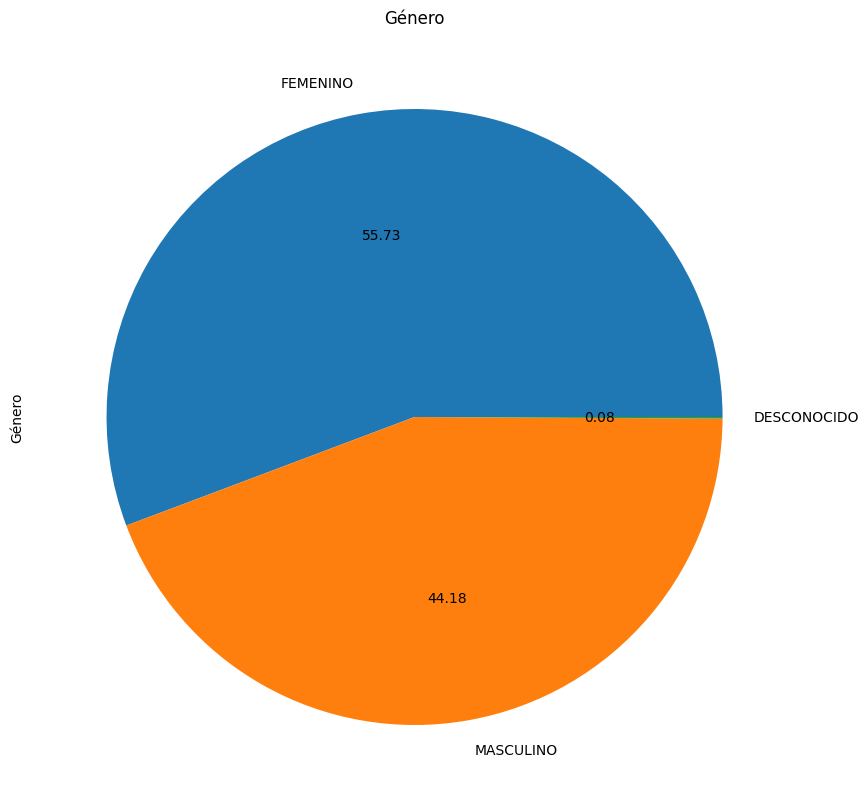

In [70]:
data_frame["Género"].value_counts().plot(kind="pie",autopct="%.2f", figsize=(12,10), title= "Género" )

##### **CAMPOS UNICOS**

In [94]:
data_frame['Área Conocimiento'].unique()

array(['NO INDICA', 'NINGUNA', 'CIENCIAS DE LA EDUCACIÓN',
       'CIENCIAS SOCIALES Y HUMANAS',
       'ECONOMÍA, ADMINISTRACIÓN CONTADURIA Y AFINES',
       'INGENIERÍA, ARQUITECTURA Y AFINES',
       'AGRONOMÍA, VETERINARIA Y AFINES', 'BELLAS ARTES',
       'MATEMÁTICAS Y CIENCIAS NATURALES', 'CIENCIAS DE LA SALUD',
       '(NO REGISTRA)', 'AGRONOMÍA, VETERINARIA Y ZOOTECNIA', 'AVIACIÓN',
       'COCINA Y CULINARIA'], dtype=object)

In [79]:
data_frame['Grupo edad'].unique()

array(['ADULTO', 'ADULTO MAYOR', 'ADULTO JOVEN', 'ADOLESCENTE', 'INFANTE'],
      dtype=object)

In [80]:
data_frame['Género'].unique()

array(['FEMENINO', 'MASCULINO', 'DESCONOCIDO'], dtype=object)